# **Final Project 2: Logistic Regression & SVM**


**Kelompok 7**
1. Fayza Chairunnisa Permana (PYTN-KS18-09)
2. Febriansyah Permana (PYTN-KS18-06)
3. Fenti Febriani (PYTN-KS18-04)

# **1. Introduction**



*   **Informasi Dataset**

Dataset didapatkan melalui link berikut:
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Dataset ini adalah database yang berisikan informasi data hujan harian selama 10 di Australia. Dataset terdiri dari 14560 baris dan 23 kolom. Dari dataset ini, siswa diharapkan dapat memprediksi Rain Tomorrow menggunakan kedua model yaitu Logistic Regression dan SVM.

*   **Latar Belakang**

Kasus yang dipilih adalah salah satu penerapan pembelajaran yang telah dilakukan dalam program Studi Independen di Hacktiv8 Batch 5 terkait konsep Logistic Regression dan SVM.


* **Objective**

1. Mampu memahami konsep Classification
dengan Logistic Regression dan SVM

2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM

3. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi



# **2. Import Library**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.integrate as integrate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# **3. Data Loading**

In [7]:
df = pd.read_csv('/content/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
df.shape

(145460, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [12]:
# cek kolom dengan tipe data object/categorical
df.describe(include=object).T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


# **4. Data Cleaning**

## **Missing Value**

Cek missing value apakah data tersebut memiliki missing value atau tidak, jika ada maka diperlukanya pembersihan agar tahapan dapat dilanjutkan

In [13]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


Pengecekan missing value diatas terdapat semua kolom yang memiliki missing value kecuali kolom Date dan Location, maka dari itu diperlukanya penghapusan missing value pada kolom

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
df.shape

(56420, 23)

Data yang tersedia sekarang yaitu 56420 baris dan 23 kolom yang sudah bersih dari missing value

In [17]:
# cek duplikasi data
df.duplicated().any()

False

# **5. Exploratory Data Analysis (EDA)**

## **Central Tendency**

In [18]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [19]:
NumCol  = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
        'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
        'Cloud3pm', 'Temp9am', 'Temp3pm']

central_tendency = pd.DataFrame({'Column':NumCol,
                                 'Mean':[df[i].mean()  for i in NumCol],
                                'Median':[df[i].median()  for i in NumCol],
                                'Modus': [df[i].mode()[0]  for i in NumCol],
                                'skewness': [skew(df[i]) for i in NumCol]})
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Column,Mean,Median,Modus,skewness,skew
0,MinTemp,13.464770,13.2,13.0,0.052468,Right skewed
1,MaxTemp,24.219206,23.9,19.6,0.185009,Right skewed
2,Rainfall,2.130397,0.0,0.0,7.502322,Right skewed
3,Evaporation,5.503135,5.0,4.0,2.232207,Right skewed
4,Sunshine,7.735626,8.6,0.0,-0.551697,Left skewed
5,WindGustSpeed,40.877366,39.0,35.0,0.960190,Right skewed
6,WindGustSpeed,40.877366,39.0,35.0,0.960190,Right skewed
7,WindSpeed9am,15.667228,15.0,13.0,0.933045,Right skewed
8,WindSpeed3pm,19.786778,19.0,17.0,0.596798,Right skewed
9,Humidity9am,65.874123,67.0,68.0,-0.489363,Left skewed


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

## **Variability**

### **Proporsi Rain Tomorrow**

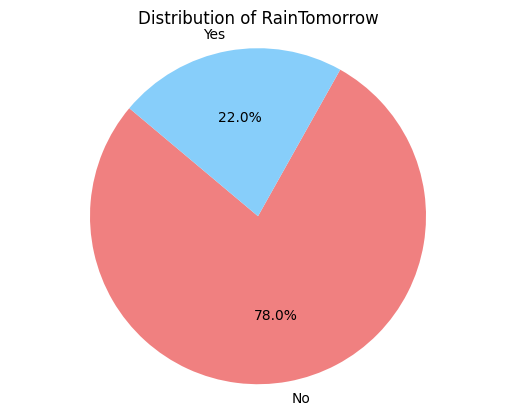

In [21]:
# Hitung jumlah nilai unique pada kolom RainTomorrow
rain_counts = df['RainTomorrow'].value_counts()

# Buat pie chart
labels = rain_counts.index
sizes = rain_counts.values
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Pastikan pie chart menjadi lingkaran

# Tampilkan judul
plt.title('Distribution of RainTomorrow')

# Tampilkan pie chart
plt.show()

Proporsi label rain tomorrow yaituu yes (22%) atau no (78%) tidak seimbang.

### **Berapa rata-rata rainfall disetiap kota?**

In [22]:
gr1 = df.groupby('Location')['Rainfall'].mean().reset_index()
gr1

,Location,Rainfall
0,AliceSprings,0.955556
1,Brisbane,2.855401
2,Cairns,4.522259
3,Canberra,1.906957
4,Cobar,1.182397
5,CoffsHarbour,3.885942
6,Darwin,4.038210
7,Hobart,1.624033
8,Melbourne,1.912118
9,MelbourneAirport,1.455787


In [23]:
gr1_top5 = df[df['Rainfall']>1].groupby(['Location'], as_index=False).agg({'Rainfall':'count'}).sort_values(by='Rainfall', ascending=False).head(5)
print('Top 5 Kota tersering Hujan:')
print(gr1_top5)

Top 5 Kota tersering Hujan:
         Location  Rainfall
17       Portland       792
6          Darwin       787
2          Cairns       744
13  NorfolkIsland       739
12   MountGambier       736


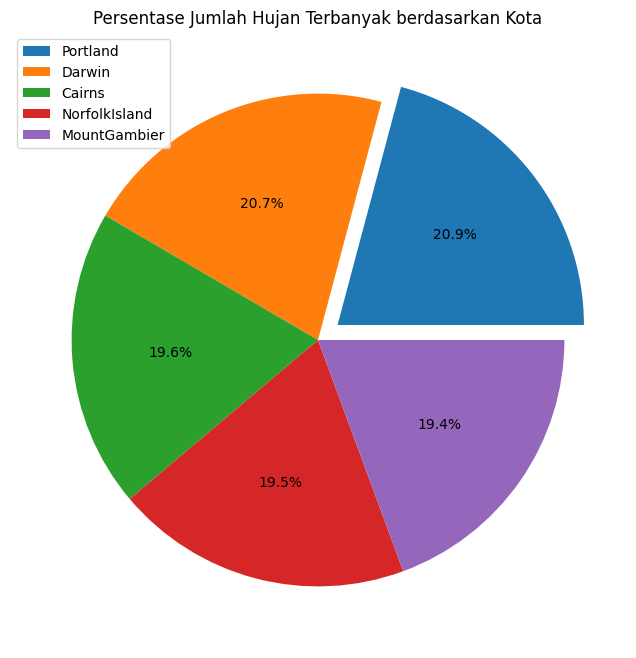

In [24]:
explode=[0.1,0,0,0,0]
plt.figure(figsize=(8,8))
plt.pie(gr1_top5['Rainfall'], labels=None,autopct='%1.1f%%',explode=explode)
plt.title('Persentase Jumlah Hujan Terbanyak berdasarkan Kota')
plt.legend(labels=gr1_top5.Location, loc='upper left')
plt.show()

In [25]:
gr1_bot5 = df[df['Rainfall']>1].groupby(['Location'], as_index=False).agg({'Rainfall':'count'}).sort_values(by='Rainfall', ascending= False).tail(5)
print('Top 5 Kota Terjarang Hujan:')
print(gr1_bot5)

Top 5 Kota Terjarang Hujan:
        Location  Rainfall
11         Moree       268
3       Canberra       219
0   AliceSprings       188
25       Woomera       128
4          Cobar        63


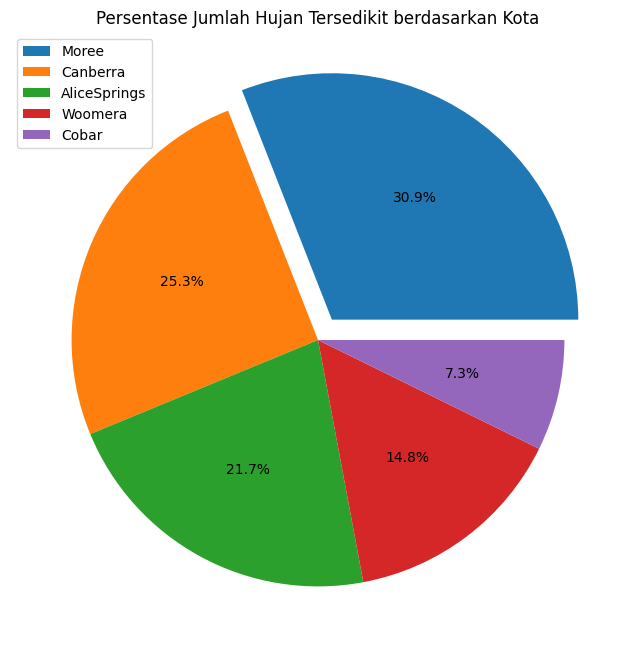

In [26]:
explode=[0.1,0,0,0,0]
plt.figure(figsize=(8,8))
plt.pie(gr1_bot5['Rainfall'], labels=None,autopct='%1.1f%%',explode=explode)
plt.title('Persentase Jumlah Hujan Tersedikit berdasarkan Kota')
plt.legend(labels=gr1_bot5.Location, loc='upper left')
plt.show()

Lokasi frekuensi dengan kota yang sering dilanda hujan adalah kota Portland dengan Rainfall 792, sedangkan kota yang jarang dilanda hujan yaitu kota Moree dengan rainfall 268 per 10 tahun terakhir

### **Adakah pengaruh antara RainToday dan RainTomorrow?**

In [27]:
pd.crosstab(df['RainToday'],
                       df['RainTomorrow'],
                       margins=True, margins_name='Total')

RainTomorrow,No,Yes,Total
RainToday,,,
No,37274,6684,43958
Yes,6719,5743,12462
Total,43993,12427,56420


<Axes: xlabel='RainToday', ylabel='count'>

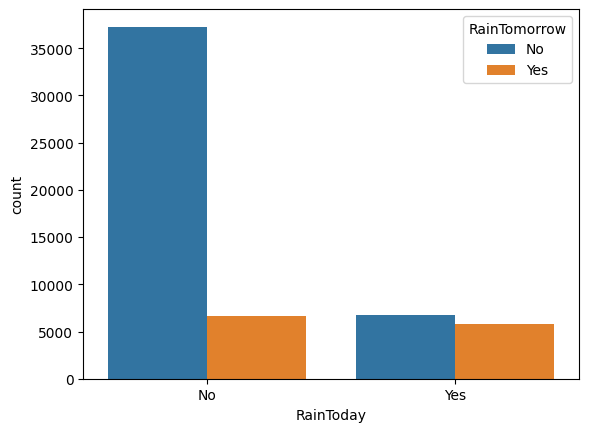

In [28]:
sns.countplot(
    x= 'RainToday',
    hue = 'RainTomorrow',
    data = df
)

Berdasarkan crosstab dan visualisasi dapat disimpulkan apabila hari ini hujan (RainToday=yes) maka ada kemungkinan jika besok akan hujan (RainTomorrow=yes), Namun jika hari ini tidak terjadi hujan (RainToday=No) akan kecil kemungkinan untuk besok terjadi hujan (RainTomorrow=No)

### **Temperatur berdasarkan waktu**

In [29]:
# Ekstrak data year to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [30]:
gr2 = df[['MinTemp', 'year']].groupby(['year'], as_index=False).agg({'MinTemp':'mean'})
gr2

,year,MinTemp
0,2007,12.545902
1,2008,12.213482
2,2009,13.267234
3,2010,13.125068
4,2011,13.344606
5,2012,12.585244
6,2013,13.444741
7,2014,13.925185
8,2015,13.787925
9,2016,14.605372


In [31]:
gr3 = df[['MaxTemp','year']].groupby(['year'], as_index=False).agg({'MaxTemp':'mean'})
gr3

,year,MaxTemp
0,2007,25.086885
1,2008,23.090601
2,2009,24.452264
3,2010,23.489631
4,2011,23.929490
5,2012,23.617138
6,2013,24.392988
7,2014,24.788251
8,2015,24.468413
9,2016,24.866849


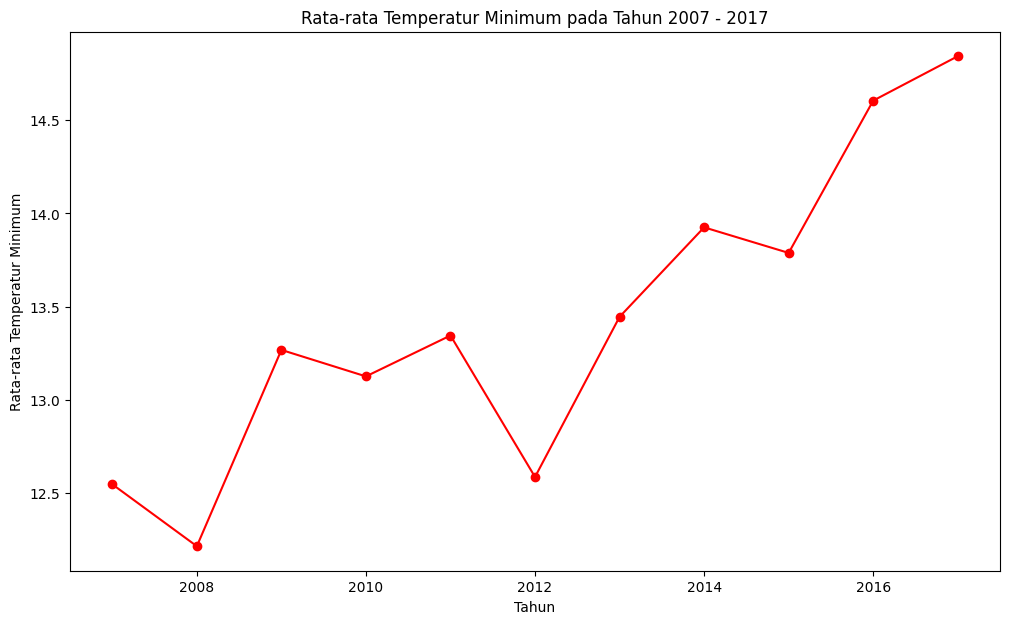

In [32]:
gr2.plot(kind='line',
                x='year',
                y='MinTemp',
                figsize=(12,7),
                color='red',
                legend = False,
                marker="o")
plt.title("Rata-rata Temperatur Minimum pada Tahun 2007 - 2017")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Temperatur Minimum")
plt.show()

Berdasarkan grafik rata-rata temperatur minimum pada 10 tahun terakhir diatas. Temperatur terendah jatuh pada tahun 2008 dengan rata-rata temperatur yaitu 11.0 derajar celcius, Sedangkan temperatur tertinggi pada tahun 2017 dengan rata-rata temperatur yaitu 15.5 derajat celcius.

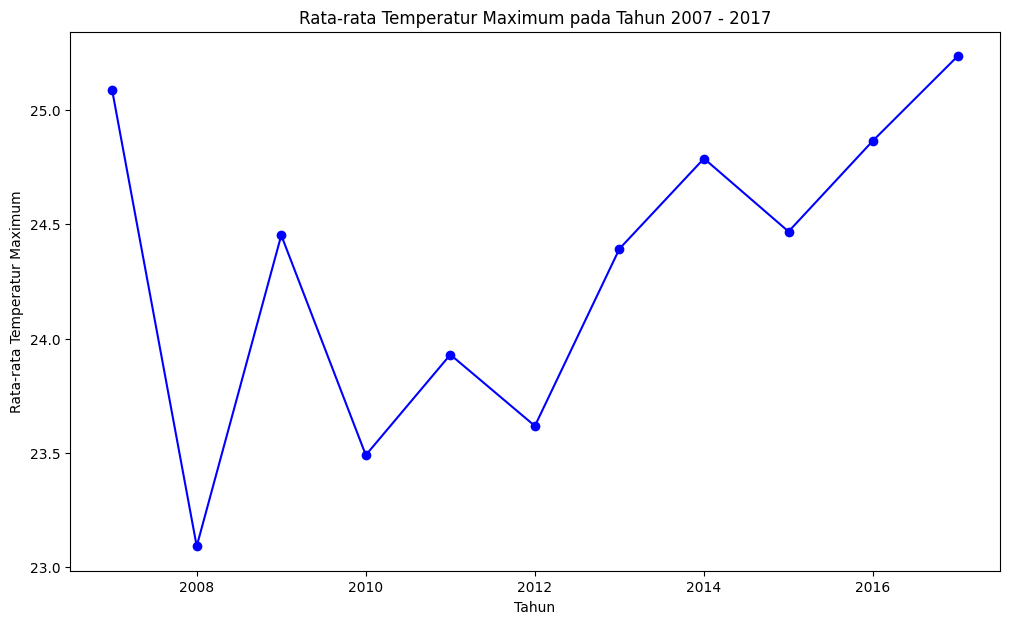

In [33]:
gr3.plot(kind='line',
                x='year',
                y='MaxTemp',
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="o")
plt.title("Rata-rata Temperatur Maximum pada Tahun 2007 - 2017")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Temperatur Maximum")
plt.show()

Berdasarkan grafik rata-rata temperatur maximum pada 10 tahun terakhir diatas. Temperatur tertinggi jatuh pada tahun 2017 dengan rata-rata temperatur yaitu 25.38 derajar celcius, Sedangkan temperatur terendah pada tahun 2008 dengan rata-rata temperatur yaitu 23.3 derajat celcius.

# **6. Data Preprocessing**

## **Encoding Data**

In [34]:
le = LabelEncoder

In [35]:
 Kat_Cols = [ 'Location','WindGustDir','WindDir9am','WindDir3pm',
         'RainToday','RainTomorrow']
df_kat = df[Kat_Cols]

le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in Kat_Cols:
    df_kat[col] = le.fit_transform(df_kat[col])

# Display the DataFrame with encoded categorical columns
print(df_kat.head())

      Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
6049         4           11           1          12          0             0
6050         4            8          10          10          0             0
6052         4            5           5           6          0             0
6053         4           14          14          15          0             0
6054         4           14           7          14          0             0


<ipython-input-35-dbfcc775815a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kat[col] = le.fit_transform(df_kat[col])
<ipython-input-35-dbfcc775815a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kat[col] = le.fit_transform(df_kat[col])
<ipython-input-35-dbfcc775815a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Location', 'WindGustDir', 'RainToday', 'RainTomorrow']:
    df[col] = label_encoder.fit_transform(df[col])

In [37]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Kolom Numerik:")
print(numeric_columns)

Kolom Numerik:
Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'year',
       'month'],
      dtype='object')


## **Korelasi antara variabel`**

###**Korelasi Variabel Kategorik**

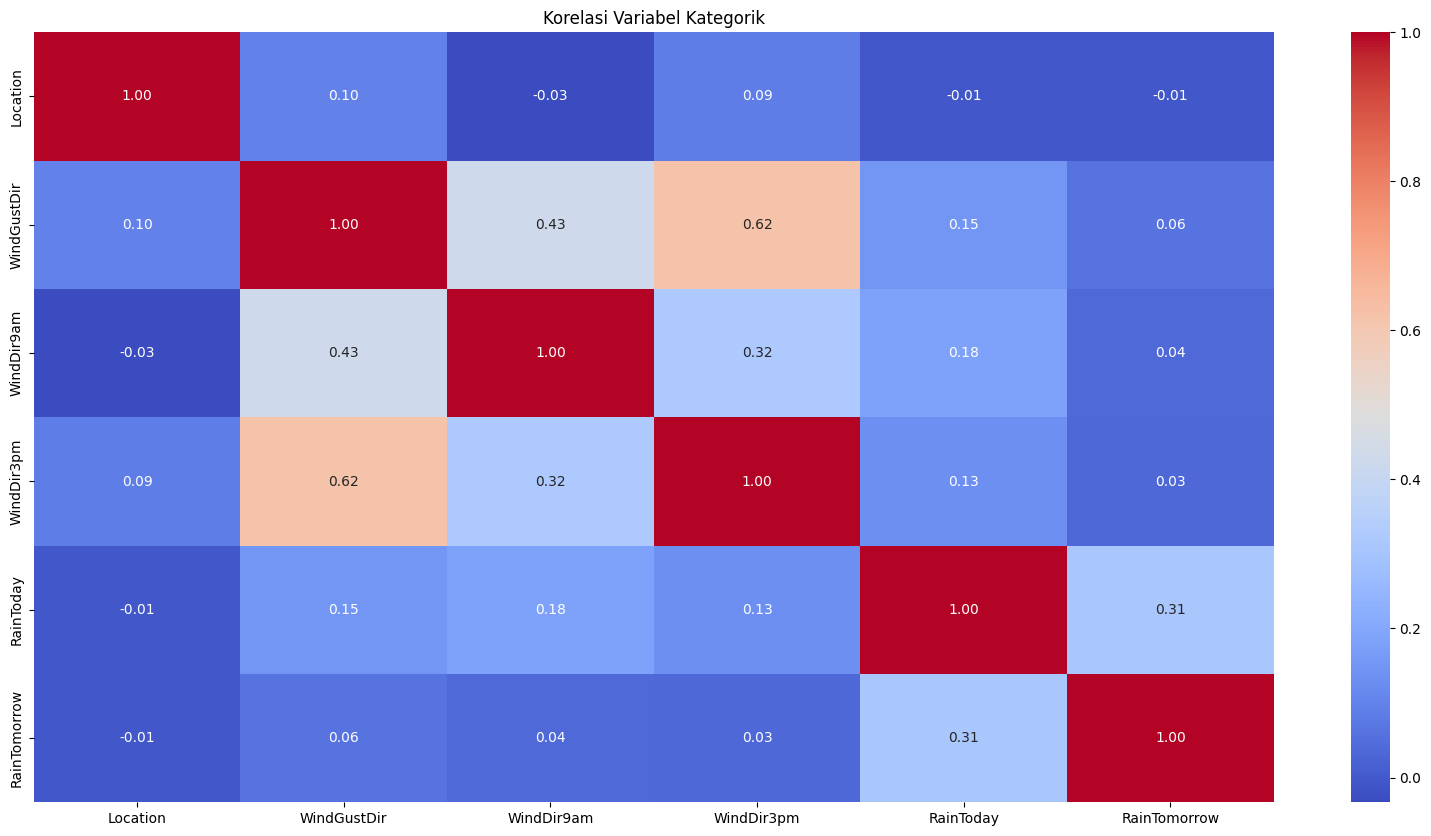

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_kat.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Variabel Kategorik')
plt.show()

Korelasi variabel kategorik memiliki korelasi 0.5 yaitu WindGustDir, WindDir9am, dan WindDir3pm. Dainatara 3 tersebut yang akan digunakan hanya WindGustDir, selain itu akan kita drop

###**Korelasi Variabel Numerik**

In [39]:
NumCol  = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
        'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
        'Cloud3pm', 'Temp9am', 'Temp3pm']

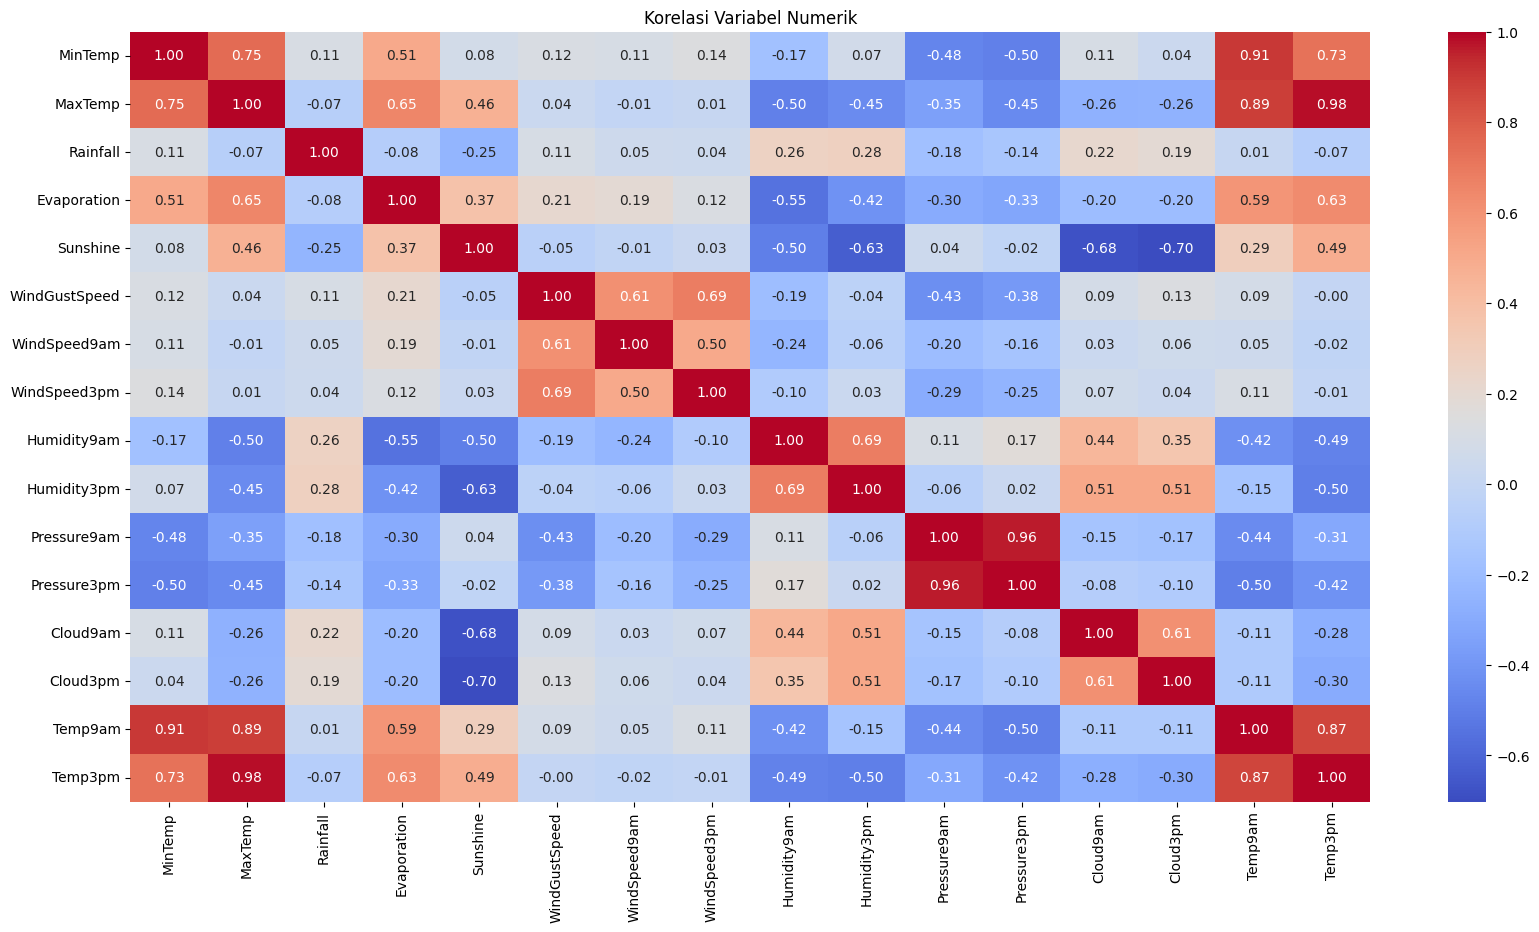

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[NumCol].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Variabel Numerik')
plt.show()

*   WindGustSpeed, WindSpeed9am, dan WindSpeed3pm memiliki korelasi tinggi yaitu diatas 0.45, maka yang akan digunakan hanya WindGustSpeed
*   Temp9am dan Temp3pm memiliki korelasi tinggi, maka yang akan digunakan yaitu Temp3pm
*   Pressure9am dan pressure3pm sama-sama memiliki korelasi yang sangat tinggi yaitu diatas 0.90, maka yang hanya digunakan yaitu pressure3pm
*   MinTemp memiliki korelasi yang sama dengan MaxTemp yaitu diatas 0.5 maka tidak akan digunakan
*   Cloud9am sama-sama memiliki korelasi tinggi dengan Cloud3pm, maka yang ahnya digunakan yaitu Cloud3pm
*   Humidity9am dan Humidity3pm memiiki korelasi yang sangat tinggi, maka yang akan digunakan salah satunya yaitu Humidity3pm


### **Outlier**

### **Drop Collumn**

In [41]:
# drop data column windDir9am dan WindDir3pm
wind_cols = ['WindDir9am', 'WindDir3pm']
df = df.drop(wind_cols,axis=1)

In [42]:
# drop data column yang korelasinya tinggi dengan column lain
del_cols = ['WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Pressure9am', 'MinTemp', 'MaxTemp', 'Cloud9am', 'Humidity9am']
df = df.drop(del_cols,axis=1)
df.head()

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow,year,month
6049,2009-01-01,4,0.0,12.0,12.3,11,48.0,13.0,1004.4,5.0,33.4,0,0,2009,1
6050,2009-01-02,4,0.0,14.8,13.0,8,37.0,8.0,1012.1,1.0,27.0,0,0,2009,1
6052,2009-01-04,4,0.0,10.8,10.6,5,46.0,22.0,1009.2,6.0,34.9,0,0,2009,1
6053,2009-01-05,4,0.0,11.4,12.2,14,31.0,22.0,1009.1,5.0,35.6,0,0,2009,1
6054,2009-01-06,4,0.0,11.2,8.4,14,35.0,15.0,1007.4,6.0,37.6,0,0,2009,1


In [43]:
# Hapus kolom waktu atau kolom non-numerik
df = df.drop(columns=['Date'])

### **Normalization**

In [44]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [45]:
scaled_df.head()

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow,year,month
0,-0.75,0.0,1.521739,0.649123,0.333333,0.529412,-1.321429,-1.107527,0.0,1.047619,0.0,0.0,-0.75,-0.833333
1,-0.75,0.0,2.130435,0.771930,0.000000,-0.117647,-1.500000,-0.279570,-0.8,0.438095,0.0,0.0,-0.75,-0.833333
2,-0.75,0.0,1.260870,0.350877,-0.333333,0.411765,-1.000000,-0.591398,0.2,1.190476,0.0,0.0,-0.75,-0.833333
3,-0.75,0.0,1.391304,0.631579,0.666667,-0.470588,-1.000000,-0.602151,0.0,1.257143,0.0,0.0,-0.75,-0.833333
4,-0.75,0.0,1.347826,-0.035088,0.666667,-0.235294,-1.250000,-0.784946,0.2,1.447619,0.0,0.0,-0.75,-0.833333


In [46]:
X = scaled_df.drop(columns='RainTomorrow')
y = scaled_df['RainTomorrow']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape, X_test.shape)

(45136, 13) (11284, 13)


### **Data Partition And Smote**

In [49]:
#Membagi fitur (x) dan target (y)
x = scaled_df.drop (columns='RainTomorrow')
y = scaled_df ['RainTomorrow']

In [50]:
# menangani ketidak seimbangan kelas (imbalance class)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# **7. Pendefinisian Model**

## **a. Logistic Regression**

In [51]:
lr_model = LogisticRegression()

## **b. SVM**

In [52]:
svm_classifier = SVC(kernel='linear')

# **8. Pelatihan Model**

## **a. Logistic Regression**

In [53]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
# Mendapatkan intercept dari model logistic regression
intercept = lr_model.intercept_
print ("Intercept Model Logistic Regressi:", intercept)

Intercept Model Logistic Regressi: [-2.16816566]


Nilai Intercept diatas menunjukan bahwa kondisi dimana semua variabel prediktor adalah nol, log odds dari kelas positif adalah -2.16816566. Log odds adalah transformasi logaritmik dari odds. Odds sendiri merupakan rasio dari probabilitas kejadian sukses terhadap kejadian tidak sukses.

In [55]:
# Mendapatkan koefisien dari model logistic regression
coefficients = lr_model.coef_
print ("Koefisien Model Logistic Regressi:", coefficients)

Koefisien Model Logistic Regressi: [[-0.03391889  0.00468177 -0.17611161 -0.8526239   0.08171902  0.67506396
   1.44563709 -0.60624118  0.55830793  0.35673443  0.31254608  0.06602639
   0.16441237]]


Nilai Koefisien diatas menunjukan setiap variabel prediktor dalam model regresi logistik.

## **b. SVM**

In [56]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
# Mendapatkan intercept dari model SVM
intercept = svm_classifier.intercept_
print ("Intercept Model SVM:", intercept)

Intercept Model SVM: [-1.4907539]


Nilai Intercept diatas menunjukan nilai dari model Support Vector Machine (SVM). Intercept dalam kontek SVM mengindikasikan jarak antara keputusan pembatas (decision boundary) dan asal koordinat pada ruang fitur.

In [58]:
# Mendapatkan koefisien dari model SVM
coefficients = svm_classifier.coef_
print("Koefisien Model SVM:", coefficients)

Koefisien Model SVM: [[-0.0448384   0.00501284 -0.03535664 -0.56340953  0.0171543   0.44889868
   1.0305269  -0.42122883  0.13880466  0.14202573  0.18539056  0.0350397
   0.08865717]]


# **9. Evaluasi Model**

## **a. Logistic Regression**

In [59]:
print('Trained Data:', lr_model.score(X_train, y_train) )
print ('Uji prediksi:', lr_model.score(X_test, y_test))
y_pred = lr_model.predict(X_train)
print('Accuracy Data Training Logistic Regression: ', accuracy_score(y_train, y_pred))
y_pred1 = lr_model.predict(X_test)
print('Accuracy Data Uji Logristic Regression: ', accuracy_score(y_test, y_pred1))

Trained Data: 0.8486573909961007
Uji prediksi: 0.8546614675646934
Accuracy Data Training Logistic Regression:  0.8486573909961007
Accuracy Data Uji Logristic Regression:  0.8546614675646934


Akurasi Data Training Logistic Regression sebesar 0.84

Akurasi Data Uji Logistic Regression sebesar 0.85

In [60]:
y_pred = lr_model.predict(X_test)

In [61]:
print('confussion matrix: ', confusion_matrix(y_test, y_pred))

confussion matrix:  [[8322  477]
 [1163 1322]]


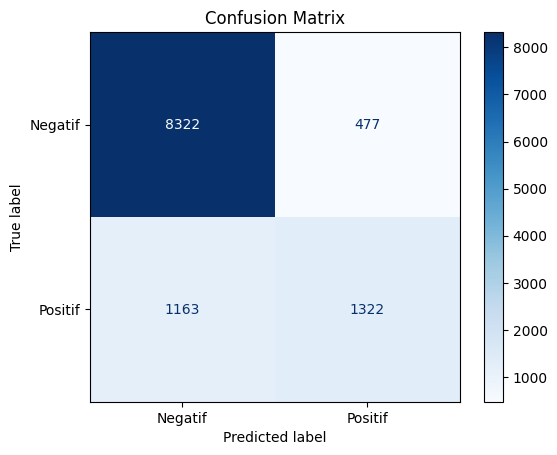

In [62]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Positif'])

# Menampilkan plot
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

* True Negative (TN): 8322

Jumlah prediksi yang benar bahwa besok tidak akan hujan dan memang tidak hujan.

* False Positive (FP): 477

Jumlah prediksi yang salah bahwa besok akan hujan, tetapi sebenarnya tidak hujan.

* False Negative (FN): 1163

Jumlah prediksi yang salah bahwa besok tidak akan hujan, tetapi sebenarnya hujan.

* True Positive (TP): 1322

Jumlah prediksi yang benar bahwa besok akan hujan dan memang hujan.

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      8799
         1.0       0.73      0.53      0.62      2485

    accuracy                           0.85     11284
   macro avg       0.81      0.74      0.76     11284
weighted avg       0.85      0.85      0.85     11284



Model Logistic Regression
* Model memiliki akurasi sekitar 85%, yang menunjukkan kemampuan umum model untuk memprediksi dengan benar.
* Untuk Kelas 0 (Label 0.0), model memiliki performa yang baik dengan precision tinggi (88%), recall tinggi (95%), dan F1-Score yang baik (91%).
* Untuk Kelas 1 (Label 1.0), model memiliki presisi yang lumayan (73%), namun recall lebih rendah (53%), sehingga dapat diperbaiki untuk mendeteksi lebih banyak instance sebenarnya dari Kelas 1.
* Nilai rata-rata menunjukkan rata-rata kinerja model secara keseluruhan, baik dengan memperhitungkan atau tanpa memperhitungkan ukuran kelas.

## **b. SVM**

In [64]:
print('Trained Data:', svm_classifier.score(X_train, y_train) )
print ('Uji prediksi:', svm_classifier.score(X_test, y_test))
y_pred_svm = svm_classifier.predict(X_train)
print('Accuracy Data Training SVM: ', accuracy_score(y_train, y_pred_svm))
y_pred_svm1 = svm_classifier.predict(X_test)
print('Accuracy Data Uji SVM: ', accuracy_score(y_test, y_pred_svm1))

Trained Data: 0.849676533144275
Uji prediksi: 0.8550159517901453
Accuracy Data Training SVM:  0.849676533144275
Accuracy Data Uji SVM:  0.8550159517901453


Akurasi Data Training SVM sebesar 0.84

Akurasi Data Uji SVM sebesar 0.85


In [65]:
print('confusion matrix:', confusion_matrix(y_test, y_pred_svm1))

confusion matrix: [[8385  414]
 [1222 1263]]


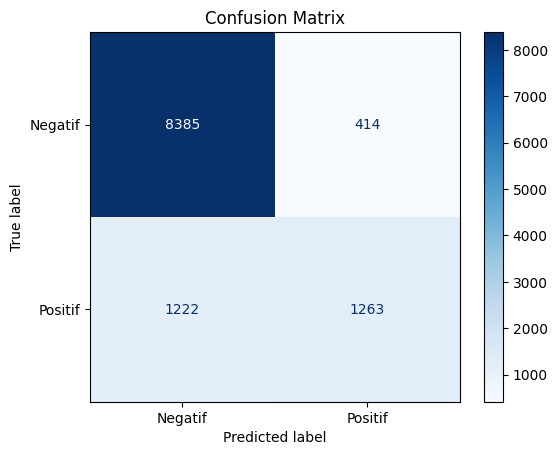

In [66]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_svm1)

# Menampilkan visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Positif'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

* True Negative (TN): 8385

Jumlah prediksi yang benar bahwa besok tidak akan hujan dan memang tidak hujan.

* False Positive (FP): 414

Jumlah prediksi yang salah bahwa besok akan hujan, tetapi ternyata tidak hujan.

* False Negative (FN): 1222

Jumlah prediksi yang salah bahwa besok tidak akan hujan, tetapi ternyata hujan.

* True Positive (TP): 1263

Jumlah prediksi yang benar bahwa besok akan hujan dan memang hujan.

In [67]:
print(classification_report(y_test, y_pred_svm1))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      8799
         1.0       0.75      0.51      0.61      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.73      0.76     11284
weighted avg       0.85      0.86      0.84     11284



Model SVM:
* Model memiliki akurasi sekitar 86%, yang mengindikasikan kemampuan umum model untuk memprediksi dengan benar.
* Untuk Kelas 0 (Label 0.0), model memiliki performa yang baik dengan precision tinggi (87%), recall tinggi (95%), dan F1-Score yang baik (91%).
* Untuk Kelas 1 (Label 1.0), model memiliki presisi yang lumayan (75%), namun recall lebih rendah (51%), sehingga dapat diperbaiki untuk mendeteksi lebih banyak instance sebenarnya dari Kelas 1.
* Nilai rata-rata menunjukkan rata-rata kinerja model secara keseluruhan, baik dengan memperhitungkan atau tanpa memperhitungkan ukuran kelas.

# **10. Model Inference**

In [68]:
df_new = df.copy()
for kolom in df.columns:
    df_new[kolom] = np.random.permutation(df[kolom].values)

print("\nDataFrame Baru (Setelah Diacak):")
df_new


DataFrame Baru (Setelah Diacak):


,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow,year,month
6049,0,41.0,3.2,9.2,0,52.0,52.0,1017.9,1.0,17.3,1,1,2012,11
6050,23,0.0,19.2,9.5,3,35.0,74.0,1013.0,6.0,20.9,0,1,2009,1
6052,16,0.0,6.4,12.0,1,56.0,13.0,1021.0,4.0,28.1,0,1,2013,6
6053,14,0.0,11.0,5.4,0,37.0,41.0,1013.1,7.0,23.6,1,0,2015,4
6054,13,0.0,10.2,12.0,13,39.0,46.0,1012.1,7.0,24.4,0,1,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,8,0.8,4.0,0.8,9,39.0,47.0,1023.0,5.0,33.2,0,1,2014,5
142299,18,0.0,5.2,11.4,14,31.0,32.0,1011.7,7.0,19.4,0,0,2011,9
142300,18,0.0,6.4,12.6,12,28.0,41.0,1006.6,7.0,29.5,0,0,2011,8
142301,20,0.0,3.4,6.9,3,61.0,58.0,1008.5,1.0,29.2,0,0,2011,2


## **a. Logistic Regression**

In [69]:
# Pisahkan fitur dari target pada DataFrame baru
X_new_logistic = df_new[['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday', 'year', 'month']]

In [70]:
# Lakukan prediksi dengan model Logistic Regression pada DataFrame baru
y_pred_new_logistic = lr_model.predict(X_new_logistic)

In [71]:
# Tampilkan hasil prediksi
df_new['Predicted_RainTomorrow_Logistic'] = y_pred_new_logistic
print("Hasil Prediksi dengan Logistic Regression:")
print(df_new[['Location', 'RainTomorrow', 'Predicted_RainTomorrow_Logistic']])

Hasil Prediksi dengan Logistic Regression:
        Location  RainTomorrow  Predicted_RainTomorrow_Logistic
6049           0             1                              0.0
6050          23             1                              0.0
6052          16             1                              0.0
6053          14             0                              0.0
6054          13             1                              0.0
...          ...           ...                              ...
142298         8             1                              0.0
142299        18             0                              0.0
142300        18             0                              0.0
142301        20             0                              0.0
142302         7             0                              0.0

[56420 rows x 3 columns]


## **b. SVM**

In [72]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [73]:
# Pisahkan fitur dari target pada DataFrame
X_new = df_new[['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday', 'year', 'month']]

In [74]:
# Lakukan prediksi dengan model SVM pada DataFrame baru
y_pred_new = svm_classifier.predict(X_new)

In [75]:
# Tampilkan hasil prediksi
df_new['Predicted_RainTomorrow'] = y_pred_new
print("Hasil Prediksi:")
print(df_new[['Location', 'RainTomorrow', 'Predicted_RainTomorrow']])

Hasil Prediksi:
        Location  RainTomorrow  Predicted_RainTomorrow
6049           0             1                     0.0
6050          23             1                     0.0
6052          16             1                     0.0
6053          14             0                     0.0
6054          13             1                     0.0
...          ...           ...                     ...
142298         8             1                     0.0
142299        18             0                     0.0
142300        18             0                     0.0
142301        20             0                     0.0
142302         7             0                     0.0

[56420 rows x 3 columns]


Dari hasil prediksi dengan 2 metode diatas yaitu model Logistic Regression dan model SVM, dapat dilihat hasil dari prediksi Rain Tomorrow yaitu memiliki nilai 0.0 yang diartikan sebagai prediksi "Tidak hujan besok"


# **11. Pengambilan Kesimpulan**

*   Proporsi pada rain tomorrow terdapat 78% kemungkinan besok tidak akan hujan  
*   Dalam 10 tahun terakhir ini hampir disetiap kota dilanda hujan, namun ada 3 kota teratas yang jarang dilanda hujan yaitu kota Moree, Canberra dan AliceSprings.
*   Rata-rata pada temperatur suhu dalam 10 tahun terakhir ini yaitu fluktuatif yang dimana temperatur maximum dan temperatur minumum terendah jatuh pada tahun 2008.
*   Setelah melakukan korelasi variabel terdapat kolom yang tidak berkolerasi atau dapat diwakilkan kolom lainnya, sehingga kolom dapat dihapus yaitu WindDir9am, WindDir3pm, Date, WindSpeed9am, WindSpeed3pm, Temp9am, Pressure9am, MinTemp, MaxTemp, Cloud9am, Humidity9am
*   Dari nilai akurasi dengan 2 model diatas yaitu Logistic Regression dan SVM terdapat nilai akurasi testing data yang lebih tinggi 0.85 dibandingkan dengan nilai akurasi training data.
* Berdasarkan Akurasi 2 model, terdapat perbedaan yang mana  model SVM sedikit lebih tinggi (86%) dari pada model Logistic Regression (85%) namun model SVM memiliki performa yang sedikit lebih lambat dan berat sehingga memakan banyak memory dibandingkan dengan model Logistic Regression.
*   Dengan pembuktian menggunakan model Logistic Regression dan model SVM bahwa hasil dari prediksi Rain tomorrow sama-sama menghasilkan prediksi "Tidak hujan besok"
* Dengan memiliki akurasi model  yang tinggi yaitu 85-86%, model dapat digunakan pada data lainnya ketika melakukan model inference


